# Method 1 - Entire Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
airpas = pd.read_csv('AirPassengers.csv')

In [10]:
airpas

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [12]:
# goal is to forecast for next 24 months (next 2 years 1961 & 1962)

In [14]:
airpas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [16]:
airpas.Month = pd.to_datetime(airpas.Month)
airpas.Month

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [18]:
airpas = airpas.set_index('Month')

In [20]:
airpas

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


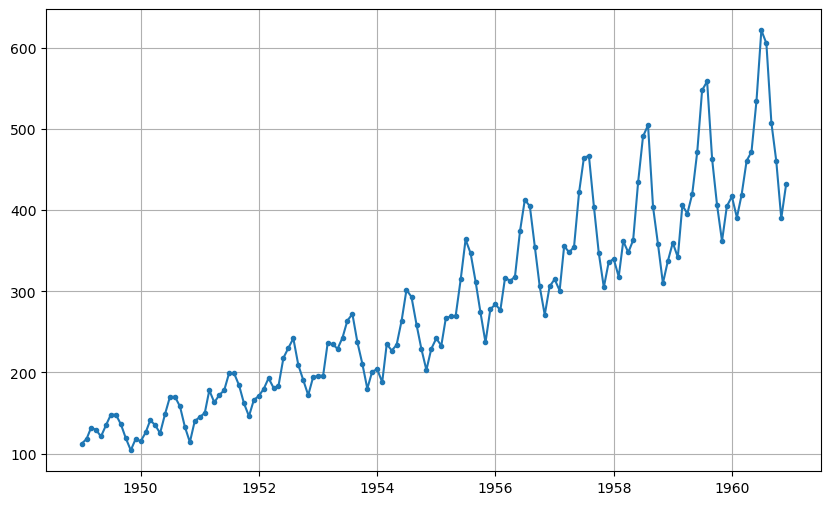

In [22]:
plt.figure(figsize=(10,6))
plt.plot(airpas.Passengers, marker='.')
plt.grid()

In [24]:
# Here we can see their is a uptrend in years but year by year values 
# are increasing it means data is not stationary we need to do differencing

In [ ]:
plt.plot(airpas.Passengers.diff().diff().diff().diff().diff().diff().diff())

In [26]:
# On above graph after using so many diff() still data is not stationary 
# so we try to standardize the data using log

In [28]:
airpas_log = np.log(airpas)

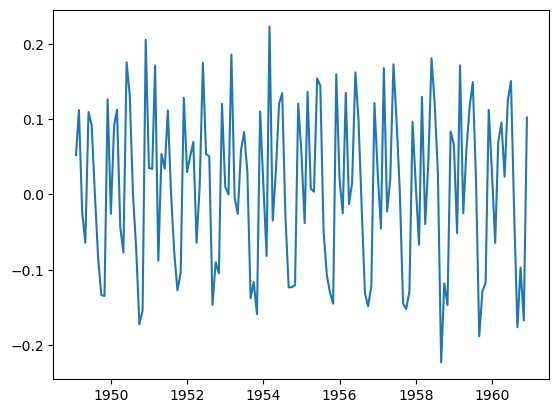

In [30]:
plt.plot(airpas_log.Passengers.diff())

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

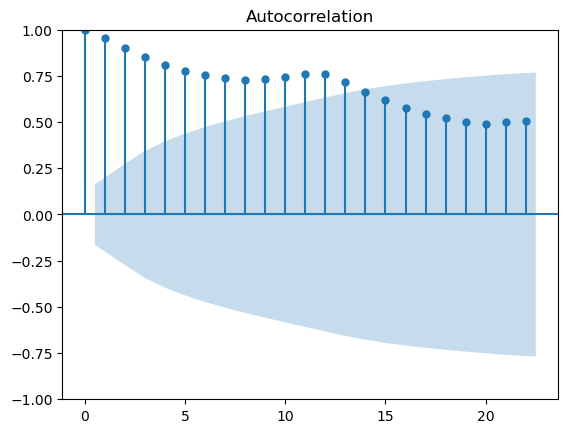

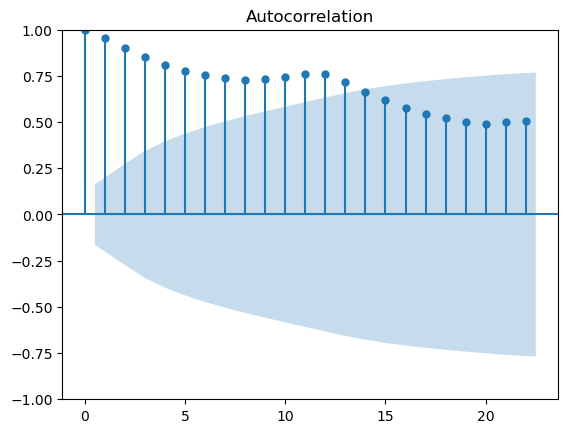

In [34]:
plot_acf(airpas_log.Passengers)

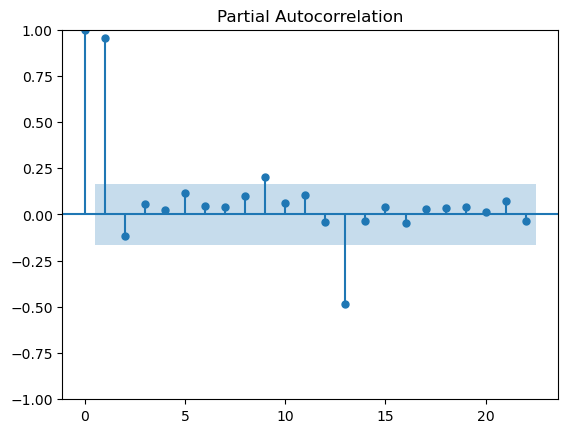

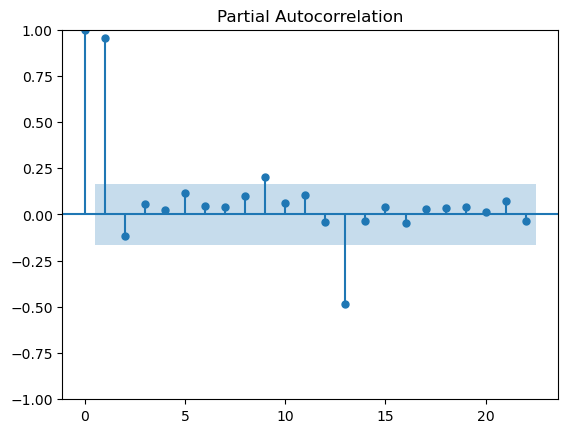

In [36]:
plot_pacf(airpas_log.Passengers)

In [38]:
# We use acf plot & pacf Plot to find p,d,q values manually 
# but it is dificult so we are using auto_arima model it gives us best values automatically 

### Without Seasonality

In [40]:
from statsmodels.tsa.arima_model import ARIMA

In [42]:
# we dont have pmdarima model preinstalled so we have to install it manually
# !pip install pmdarima

In [44]:
import pmdarima
from pmdarima import auto_arima

In [45]:
auto_arima(airpas_log) # it will run model many times and give the values of p,d,q

ARIMA(order=(5, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model_sarima = SARIMAX(airpas_log, order=(5,1,4))

C:\Users\prati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
results = model_sarima.fit()

C:\Users\prati\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
pred_log = results.predict(start=144, end=167) # here we taking values as rows
pred_log

1961-01-01    6.089055
1961-02-01    6.082758
1961-03-01    6.125589
1961-04-01    6.245758
1961-05-01    6.283986
1961-06-01    6.326217
1961-07-01    6.374759
1961-08-01    6.318878
1961-09-01    6.263527
1961-10-01    6.219812
1961-11-01    6.125506
1961-12-01    6.085822
1962-01-01    6.094673
1962-02-01    6.095043
1962-03-01    6.155770
1962-04-01    6.236262
1962-05-01    6.277349
1962-06-01    6.327209
1962-07-01    6.345251
1962-08-01    6.303353
1962-09-01    6.262374
1962-10-01    6.204882
1962-11-01    6.133031
1962-12-01    6.105485
Freq: MS, Name: predicted_mean, dtype: float64

In [58]:
pred = np.exp(pred_log)
pred = np.round(pred)
pred

1961-01-01    441.0
1961-02-01    438.0
1961-03-01    457.0
1961-04-01    516.0
1961-05-01    536.0
1961-06-01    559.0
1961-07-01    587.0
1961-08-01    555.0
1961-09-01    525.0
1961-10-01    503.0
1961-11-01    457.0
1961-12-01    440.0
1962-01-01    443.0
1962-02-01    444.0
1962-03-01    471.0
1962-04-01    511.0
1962-05-01    532.0
1962-06-01    560.0
1962-07-01    570.0
1962-08-01    546.0
1962-09-01    524.0
1962-10-01    495.0
1962-11-01    461.0
1962-12-01    448.0
Freq: MS, Name: predicted_mean, dtype: float64

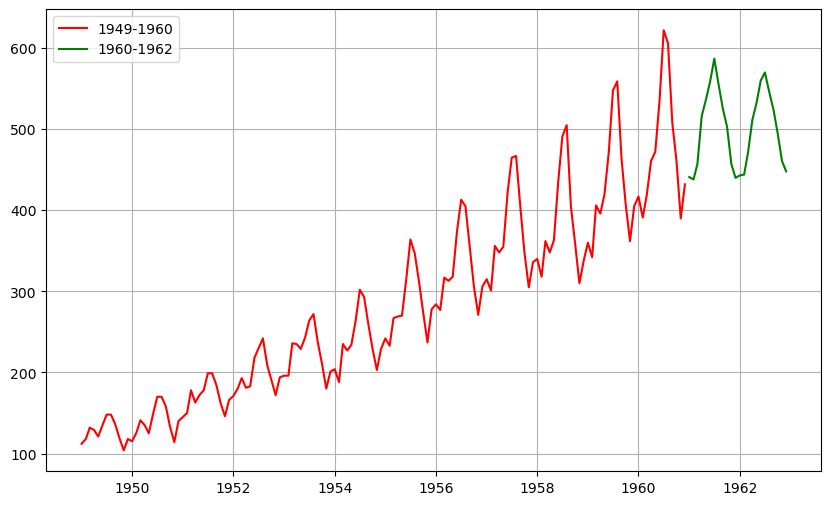

In [60]:
plt.figure(figsize=(10,6))
plt.plot(airpas, color='red', label='1949-1960')
plt.plot(pred, color='green', label='1960-1962')
plt.grid()
plt.legend()

### With seasonality

In [78]:
# Model is not doing good
# lest consider seasonality this time

In [80]:
auto_arima(airpas_log, seasonal=True, m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [82]:
model_sarima = SARIMAX(airpas_log, order = (2,0,0), seasonal_order = (0,1,1,12))

C:\Users\prati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [84]:
results = model_sarima.fit()

In [86]:
pred_log=results.predict(start=144,end=167)

In [88]:
pred=np.exp(pred_log)
pred=np.round(pred)
pred

1961-01-01    448.0
1961-02-01    422.0
1961-03-01    475.0
1961-04-01    487.0
1961-05-01    503.0
1961-06-01    576.0
1961-07-01    661.0
1961-08-01    657.0
1961-09-01    549.0
1961-10-01    488.0
1961-11-01    422.0
1961-12-01    468.0
1962-01-01    484.0
1962-02-01    456.0
1962-03-01    513.0
1962-04-01    526.0
1962-05-01    543.0
1962-06-01    621.0
1962-07-01    712.0
1962-08-01    708.0
1962-09-01    591.0
1962-10-01    526.0
1962-11-01    454.0
1962-12-01    503.0
Freq: MS, Name: predicted_mean, dtype: float64

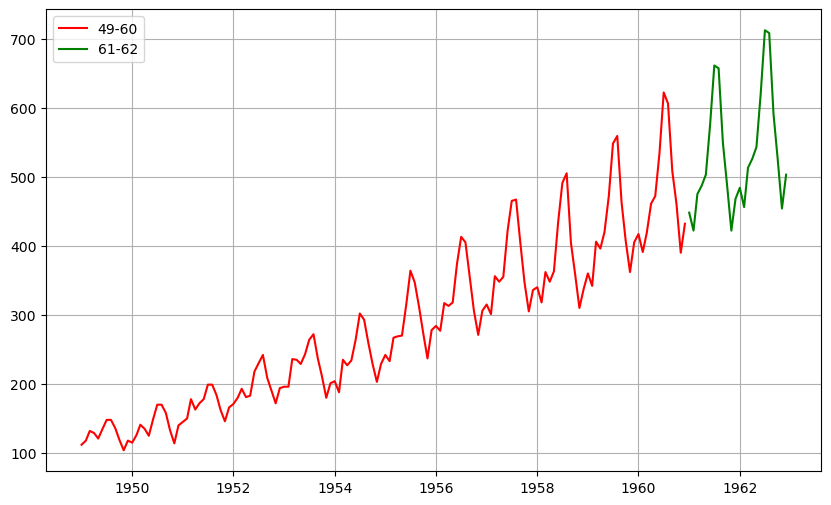

In [90]:
plt.figure(figsize=(10,6))
plt.plot(airpas , color = "red" , label = "49-60")
plt.plot(pred , color = "green" , label = "61-62")
plt.grid()
plt.legend()

In [62]:
# we built the model on entire data 

# Method 2 - Train-Test Split

In [66]:
# Lets try by dividing data into train and test split 

In [68]:
airpas = pd.read_csv('AirPassengers.csv')

In [70]:
airpas.Month = pd.to_datetime(airpas.Month)

In [72]:
airpas=airpas.set_index('Month')

In [74]:
airpas_log=np.log(airpas)
airpas_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [76]:
airpas_train=airpas_log.iloc[0:132] # training on 1949 - 1959
airpas_test=airpas_log.iloc[132:144] # testing 1960

In [96]:
airpas_test

,Passengers
Month,
1960-01-01,6.033086
1960-02-01,5.968708
1960-03-01,6.037871
1960-04-01,6.133398
1960-05-01,6.156979
1960-06-01,6.282267
1960-07-01,6.432940
1960-08-01,6.406880
1960-09-01,6.230481


In [98]:
auto_arima(airpas_train, seasonal=True, m=12) # here we set seasonal true and give it according to year like m=12 means season of 12 months

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [99]:
model_sarima=SARIMAX(airpas_log,order=(2,0,0),seasonal_order=(0,1,1,12))

C:\Users\prati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prati\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [100]:
results = model_sarima.fit()

In [101]:
pred_log = results.predict(start=132, end=143)

In [102]:
pred = np.exp(pred_log)
pred = np.round(pred)
pred

1960-01-01    420.0
1960-02-01    397.0
1960-03-01    459.0
1960-04-01    420.0
1960-05-01    460.0
1960-06-01    548.0
1960-07-01    611.0
1960-08-01    624.0
1960-09-01    512.0
1960-10-01    445.0
1960-11-01    400.0
1960-12-01    439.0
Freq: MS, Name: predicted_mean, dtype: float64

In [103]:
actual = np.exp(airpas_test.Passengers)

In [104]:
err = pred - actual
err

1960-01-01     3.0
1960-02-01     6.0
1960-03-01    40.0
1960-04-01   -41.0
1960-05-01   -12.0
1960-06-01    13.0
1960-07-01   -11.0
1960-08-01    18.0
1960-09-01     4.0
1960-10-01   -16.0
1960-11-01    10.0
1960-12-01     7.0
Freq: MS, dtype: float64

In [105]:
mape = np.mean(np.abs(err*100/actual))
acc = 100 - mape
acc # manually

96.762678702901

In [106]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(actual,pred)*100
ACC=100-MAPE
ACC # by using function

96.762678702901

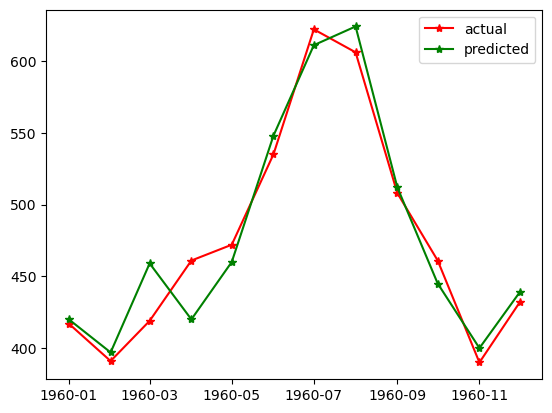

In [107]:
plt.plot(actual,color='red',label='actual',marker='*')
plt.plot(pred, color='green',label='predicted',marker='*')
plt.legend()